# Introduction to Clustering with K-Means

> "If the intelligence is a cake the bulk of the cake is unsupervised learning, the icing on the cake is supervised learning and the cherry on the cake is reinforcement learning." Yann LeCun (NIPS 2016)

This notebook will showcase how to cluster data with the K-Means algorithm. We will use scikit-learn's implementation and apply it to the fashion MNIST dataset.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import random

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
#from sklearn.neighbors import NearestNeighbors

from sklearn.metrics import rand_score

from tensorflow.keras.datasets import fashion_mnist

from yellowbrick.cluster import KElbowVisualizer
#from yellowbrick.cluster import SilhouetteVisualizer

## Notebook Objectives:

* short EDA (show data and label)
* elbow plot
* cluster sklearn kmeans 
* error analysis by showing pictures of clusters
* How do you figure out if clustering worked, if you don't have pictures that are easy to inspect?

Elbow with yellowbrick: dashed line is point of maximum curvature


## The Data

The fasion MNIST dataset contains 70000 28x28 greyscale images of fashion products from a dataset of Zalando article images. It consists of 10 different classes which 7000 images per category. It is freely available for training and testing machine learning applications and can be directly downloaded from Tensorflow.

In [12]:
# Download data from Tensorflow
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()
print('Fashion MNIST Dataset Shape:')
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(Y_test.shape))


Fashion MNIST Dataset Shape:
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [13]:
# class labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

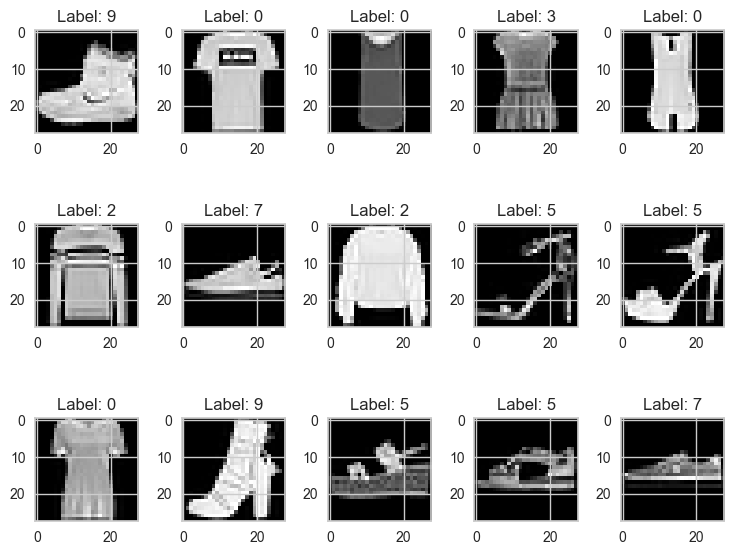

In [62]:
# Change plot to show one per label


# specify the number of rows and columns you want to see
num_row = 3
num_col = 5

# get a segment of the dataset
num = num_row*num_col
images = X_train[:num]
labels = Y_train[:num]

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num_row*num_col):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [15]:
# Add plot to show several picture per category (add variable to change class)

## Pre-process Data for clustering

NOTE: take sample from training data for elbow plot

In [16]:
X_train_flat = X_train.reshape(60000,-1)
X_test_flat = X_test.reshape(10000, -1)

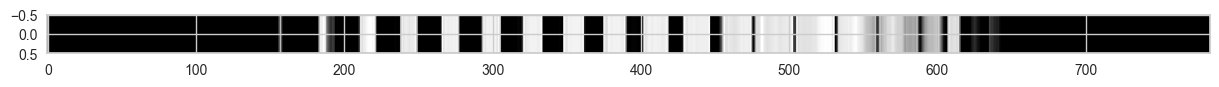

In [70]:
plt.figure(figsize=(15,0.5))
plt.imshow(X_train_flat[42].reshape(-1,1).T, aspect="auto", cmap="gray", vmin=0, vmax=255);

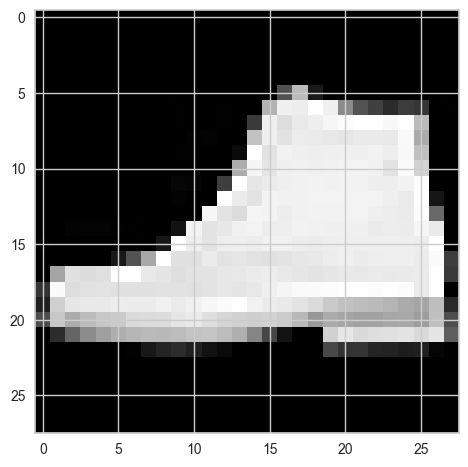

In [71]:
# pick a sample to plot
sample = 42
image = X_train[sample]

# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.show()

## Apply K-Means

(Note: mention that labels are usually not part of unsupervised learning)

Apply elbow things only to sample

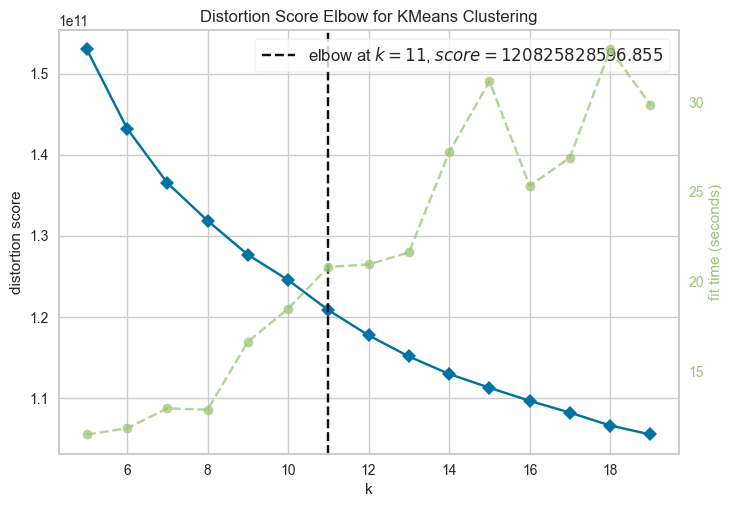

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [28]:
# Elbow method to determine value for k 
model_yb = KMeans(n_init=10)
visualizer = KElbowVisualizer(model_yb, k=(5,20))
visualizer.fit(X_train_flat)        # Fit the data to the visualizer
visualizer.show()

In [72]:
# Train k-means with whole training data
kmeans = KMeans(10,  n_init="auto")
kmeans.fit(X_train_flat)

KMeans(n_clusters=10, n_init='auto')

## Evaluate Performance and Error Analysis

In [19]:
y_pred_train = kmeans.predict(X_train_flat)
y_pred_test = kmeans.predict(X_test_flat)

In [20]:
print(rand_score(Y_train, y_pred_train))
print(rand_score(Y_test, y_pred_test))

0.8806769307266232
0.8817559555955595


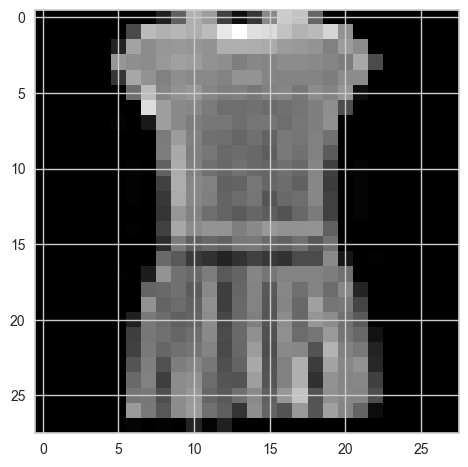

In [21]:
# pick a sample to plot
sample = 3
image = X_train[sample]

# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

In [24]:
kmeans.inertia_

125211030674.44511

In [25]:
centroid = kmeans.cluster_centers_[5].reshape(28,28)

TypeError: Invalid shape (784,) for image data

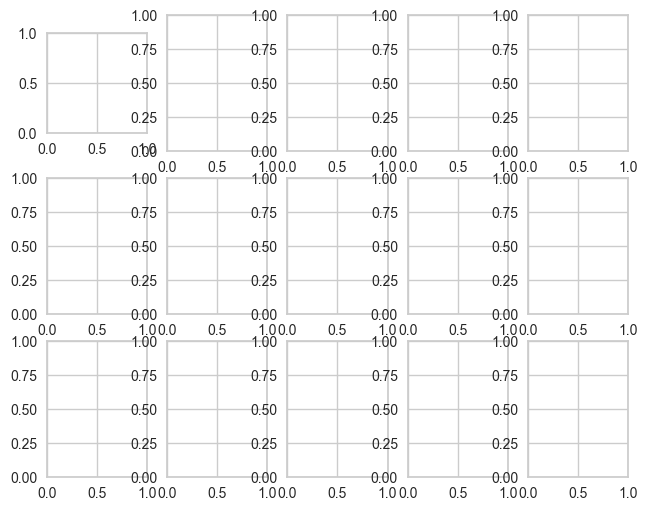

In [26]:
# specify the number of rows and columns you want to see
num_row = 3
num_col = 5

# get a segment of the dataset
num = num_row*num_col
images = kmeans.cluster_centers_
#labels = Y_train[:num]

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num_row*num_col):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [ ]:
num_row = 2
num_col = 5

fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(10):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(kmeans.cluster_centers_[i].reshape(28,28), cmap='gray')

In [ ]:
y_pred = kmeans.predict(X_train.reshape(60000,-1))

In [ ]:
y_pred[20:40]

In [ ]:
plt.imshow(X_train[23], cmap="Greys");

In [ ]:
Y_train[23]

In [ ]:
num_row = 2
num_col = 5
class_label = 3

fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i, pic in enumerate(np.where(y_pred == class_label)[0][:10]):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(X_train[pic].reshape(28,28), cmap='gray')

In [ ]:
plt.imshow(kmeans.cluster_centers_[class_label].reshape(28,28), cmap="Greys")

## DBSCAN

In [ ]:
model_s = KMeans(7, random_state=42)
visualizer_s = SilhouetteVisualizer(model_s, colors='yellowbrick')
visualizer_s.fit(X_train.reshape(60000,-1))        # Fit the data to the visualizer
visualizer_s.show()

In [ ]:
model_s = KMeans(10, random_state=42)
visualizer_s = SilhouetteVisualizer(model_s, colors='yellowbrick')
visualizer_s.fit(X_train.reshape(60000,-1))        # Fit the data to the visualizer
visualizer_s.show()

In [ ]:
dbscan = DBSCAN(eps=1200, min_samples=100)

dbscan.fit(X_train.reshape(60000, -1))

In [ ]:
sum(dbscan.labels_)

In [ ]:
pd.Series(dbscan.labels_).value_counts()

In [ ]:
# Initialize and fit NearestNeighbors object
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fitted = neighbors.fit(X_train.reshape(60000, -1))

# Get distance and indices of pairs of points
distances, indices = neighbors_fitted.kneighbors(X_train.reshape(60000, -1))

# Sort distances 
distances = np.sort(distances, axis=0)
distances = distances[:,1]

# Plot distances to determine suitable value for epsilon
plt.plot(distances)
plt.hlines(0.025, 0, 2130, linestyles='--', color='black',linewidth=2)
plt.ylabel("Distance", size=22)
plt.xticks(size=18)
plt.yticks(size=18)
plt.title("Find suitable value for epsilon", size=26)
plt.text(1900, 0.03,"~ 0.025", size=22);

In [ ]:
plt.plot(distances)
#plt.hlines(0.025, 0, 2130, linestyles='--', color='black',linewidth=2)
plt.ylabel("Distance", size=22)
plt.xticks(size=18)
plt.yticks(size=18)
plt.title("Find suitable value for epsilon", size=26)
plt.text(1900, 0.03,"~ 0.025", size=22);